In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

from automix.model.inputOutput.trackBuilder import TrackBuilder
from automix.featureExtraction.lowLevel import (Cqt, Hpss, Normalize, PeakPicking, ReadFile, Windowing, OnsetDetection)

In [4]:
TRACKBUILDER = TrackBuilder()
tracksPath = TRACKBUILDER.getFolderPaths("/home/mickael/Documents/Datasets/drumsTranscription/ADTOF/Monophonic/Zildjian soundlab 2019/")
tracks = TRACKBUILDER.runEstimators(tracksPath, estimators=[ReadFile(), OnsetDetection(), Cqt(parameterBinNumber=84)])

/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1377: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_agg[idx_agg] = aggregate(data[idx_in], axis=axis)
/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1377: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_agg[idx_agg] = aggregate(data[idx_in], axis=axis)


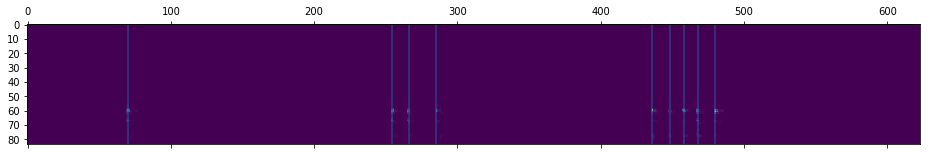

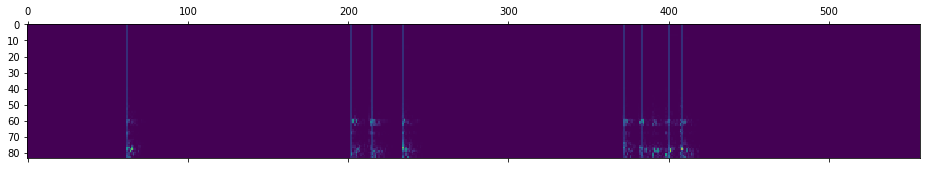

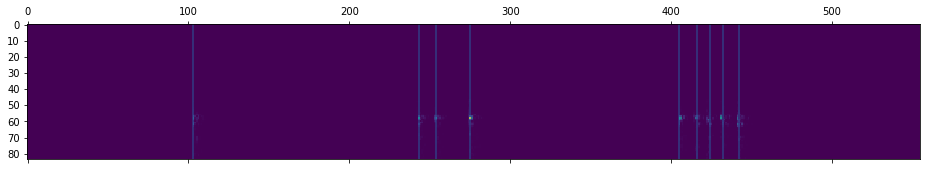

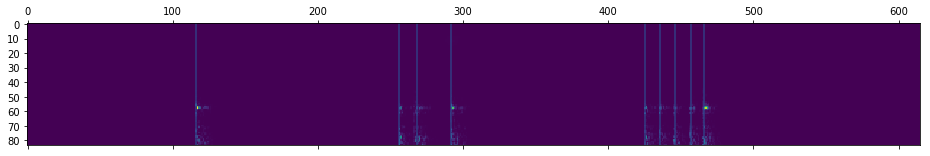

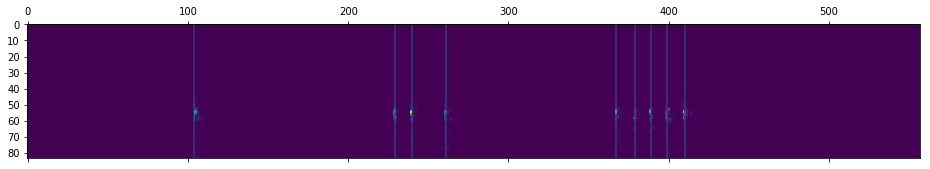

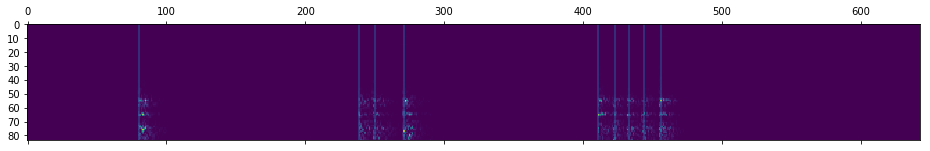

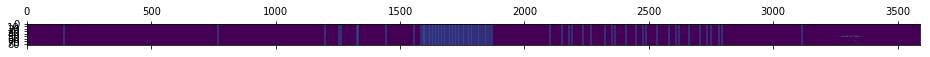

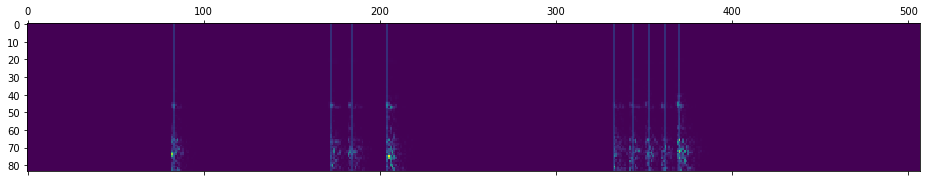

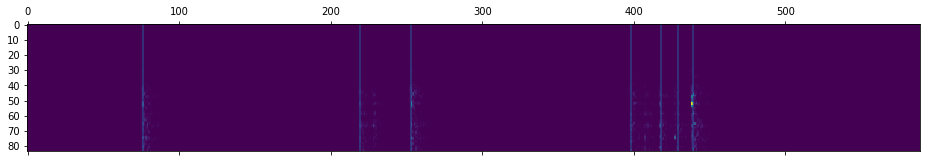

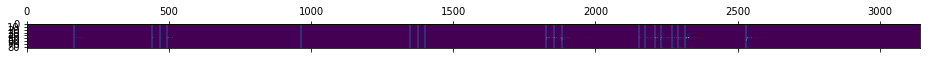

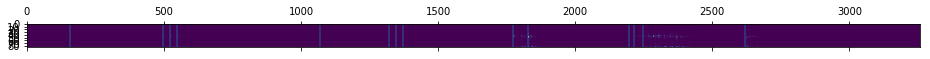

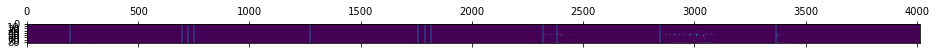

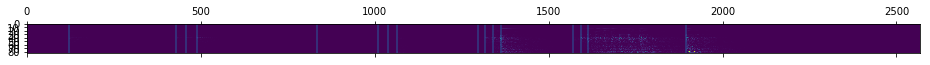

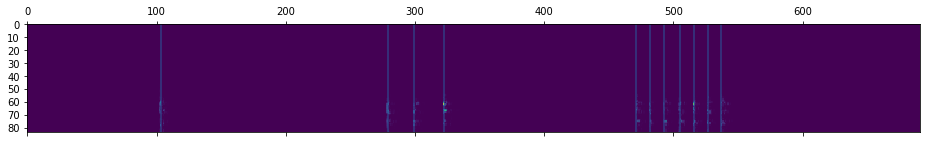

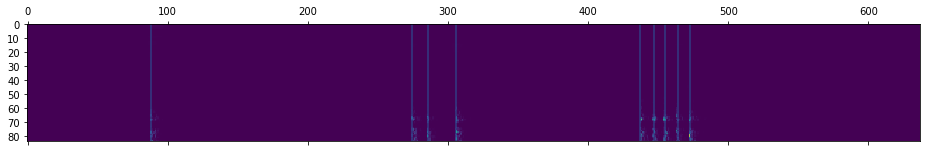

In [9]:
for track in tracks:
    
#     plt.figure(figsize=(15,5))
#     plt.title(track.name)
    track.features["cqt"].plot()
#     plt.plot
#     track.features["onsetDetection"].plot(show=True)
    for i, line in enumerate(track.features["onsetDetection"].times):
        plt.axvline(line * track.features["cqt"].sampleRate, alpha=0.5)
        
    plt.show()


In [76]:
import random

windowSize = 0.2
preWindow = 0.1

X = []
y = []

for track in tracks:
    for i, line in enumerate(track.features["onsetDetection"].times):
        X.append(track.features["cqt"].getValues(line - preWindow, line - preWindow + windowSize).flatten())
#         y.append(1 if "Stack" in track.name else 0)
        y.append(track.name[:22])

X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)
print(y)

(228, 1512) (228,)
['Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 10'
 'Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 10'
 'Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 10'
 'Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 10'
 'Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 10'
 'Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 10'
 'Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 10'
 'Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 10'
 'Zildjian Sound Lab_ 10' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 12'
 'Zildjian Sound Lab_ 12' 'Zildjian Sound Lab_ 14'
 'Zildjian Sound Lab_ 14' 'Zildjian Sound Lab_ 14'
 'Zildjian S

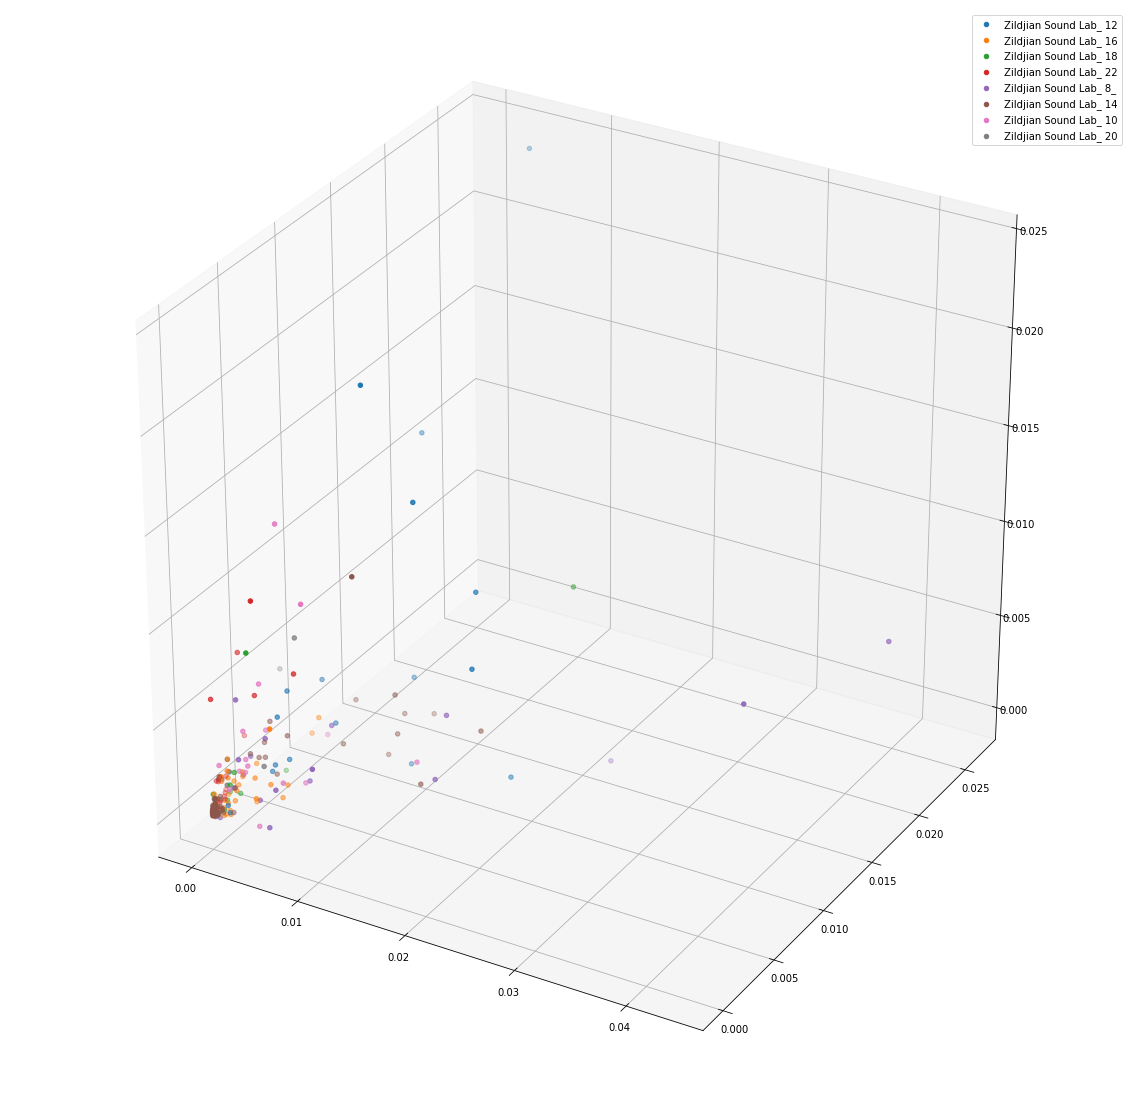

In [77]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(X)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

pca.transform(X)
for label in set(y):
    value = np.array([x for i,x in enumerate(X) if y[i] == label])
    ax.scatter(value[:,0], value[:,1], value[:,2], label=label)
#     print(value)
plt.legend()

plt.show()


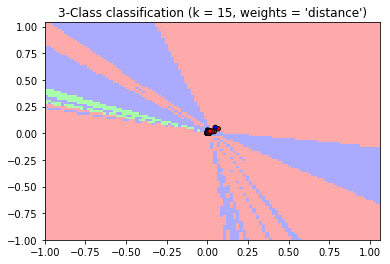

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15


h = .02  # step size in the mesh

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)



# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))

plt.show()